##Importing all the libraries

In [6]:
from sklearn.preprocessing import OneHotEncoder
from flask import Flask, render_template, request
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neural_network import MLPRegressor
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime, timedelta



#importing the dataset




In [9]:
data = pd.read_csv('Train.csv')

In [13]:
len(data)

33750

In [15]:
data

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume
0,2012-10-02 09:00:00,NaN,121,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,scattered clouds,5545
1,2012-10-02 10:00:00,NaN,178,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,broken clouds,4516
2,2012-10-02 11:00:00,NaN,113,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,overcast clouds,4767
3,2012-10-02 12:00:00,NaN,20,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,overcast clouds,5026
4,2012-10-02 13:00:00,NaN,281,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,broken clouds,4918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33745,2017-05-17 21:00:00,NaN,74,85,1,328,7,7,287.88,0.0,0.0,90,Mist,mist,2348
33746,2017-05-17 22:00:00,NaN,81,70,1,24,2,2,286.95,0.0,0.0,90,Rain,heavy intensity rain,2194
33747,2017-05-17 22:00:00,NaN,138,70,1,24,1,1,286.95,0.0,0.0,90,Mist,mist,2194
33748,2017-05-17 23:00:00,NaN,229,66,1,42,6,6,285.75,0.0,0.0,90,Rain,heavy intensity rain,1328


In [17]:
data.iloc[0]

date_time              2012-10-02 09:00:00
is_holiday                             NaN
air_pollution_index                    121
humidity                                89
wind_speed                               2
wind_direction                         329
visibility_in_miles                      1
dew_point                                1
temperature                         288.28
rain_p_h                               0.0
snow_p_h                               0.0
clouds_all                              40
weather_type                        Clouds
weather_description       scattered clouds
traffic_volume                        5545
Name: 0, dtype: object

In [19]:
data.iloc[126]

date_time              2012-10-08 00:00:00
is_holiday                    Columbus Day
air_pollution_index                    144
humidity                                45
wind_speed                               9
wind_direction                         300
visibility_in_miles                      5
dew_point                                5
temperature                         273.08
rain_p_h                               0.0
snow_p_h                               0.0
clouds_all                              20
weather_type                        Clouds
weather_description             few clouds
traffic_volume                         455
Name: 126, dtype: object

#taking the required features or columns
Collecting the data


In [22]:
data.isnull().sum()

date_time                  0
is_holiday             33707
air_pollution_index        0
humidity                   0
wind_speed                 0
wind_direction             0
visibility_in_miles        0
dew_point                  0
temperature                0
rain_p_h                   0
snow_p_h                   0
clouds_all                 0
weather_type               0
weather_description        0
traffic_volume             0
dtype: int64

#### Holiday----> 1
#### Not Holiday -----> 0

In [25]:
data['is_holiday'] = np.where(data['is_holiday'].isnull(), 0, 1)
data['is_holiday'] = data['is_holiday'].astype(int)

data['date_time'] = pd.to_datetime(data['date_time'])
data['hour'] = data['date_time'].map(lambda x: int(x.strftime("%H")))
data['month_day'] = data['date_time'].map(lambda x: int(x.strftime("%d")))
data['weekday'] = data['date_time'].map(lambda x: x.weekday()+1)
data['month'] = data['date_time'].map(lambda x: int(x.strftime("%m")))
data['year'] = data['date_time'].map(lambda x: int(x.strftime("%Y")))
data.to_csv("traffic_volume_data.csv", index=False)

In [27]:
data1 = pd.read_csv('traffic_volume_data.csv')
data1.iloc[12]

date_time              2012-10-02 21:00:00
is_holiday                               0
air_pollution_index                    128
humidity                                61
wind_speed                               4
wind_direction                         325
visibility_in_miles                      4
dew_point                                4
temperature                         288.61
rain_p_h                               0.0
snow_p_h                               0.0
clouds_all                               1
weather_type                         Clear
weather_description           sky is clear
traffic_volume                        2361
hour                                    21
month_day                                2
weekday                                  2
month                                   10
year                                  2012
Name: 12, dtype: object

In [29]:
data2 = data1.sample(10000).reset_index(drop=True)
label_columns = ['weather_type', 'weather_description']
numeric_columns = ['is_holiday', 'temperature',
                       'weekday', 'hour', 'month_day', 'year', 'month']

In [31]:
features = numeric_columns+label_columns
X = data2[features]
X.head()

,is_holiday,temperature,weekday,hour,month_day,year,month,weather_type,weather_description
0,0,289.08,5,2,6,2014,6,Mist,mist
1,0,293.46,5,2,28,2013,6,Clouds,scattered clouds
2,0,300.65,1,13,17,2013,6,Clear,Sky is Clear
3,0,290.91,7,5,22,2014,6,Clear,sky is clear
4,0,288.81,5,14,11,2014,4,Clouds,few clouds


In [33]:
X.shape


(10000, 9)

In [35]:
from functools import reduce
def unique(list1):
    ans = reduce(lambda re, x: re+[x] if x not in re else re, list1, [])
    print(ans)

n1 = data2['weather_type']
n2 = data2['weather_description']
unique(n1)
unique(n2)
n1features = ['Rain', 'Clouds', 'Clear', 'Snow', 'Mist',
              'Drizzle', 'Haze', 'Thunderstorm', 'Fog', 'Smoke', 'Squall']
n2features = ['light rain', 'few clouds', 'Sky is Clear', 'light snow', 'sky is clear', 'mist', 'broken clouds', 'moderate rain', 'drizzle', 'overcast clouds', 'scattered clouds', 'haze', 'proximity thunderstorm', 'light intensity drizzle', 'heavy snow', 'heavy intensity rain', 'fog', 'heavy intensity drizzle', 'shower snow', 'snow', 'thunderstorm with rain',
              'thunderstorm with heavy rain', 'thunderstorm with light rain', 'proximity thunderstorm with rain', 'thunderstorm with drizzle', 'smoke', 'thunderstorm', 'proximity shower rain', 'very heavy rain', 'proximity thunderstorm with drizzle', 'light rain and snow', 'light intensity shower rain', 'SQUALLS', 'shower drizzle', 'thunderstorm with light drizzle']

n11 = []
n22 = []
for i in range(10000):
    if(n1[i]) not in n1features:
        n11.append(0)
    else:
        n11.append((n1features.index(n1[i]))+1)
    if n2[i] not in n2features:
        n22.append(0)
    else:
        n22.append((n2features.index(n2[i]))+1)
# print(n11)
# print(n22)
data2['weather_type'] = n11
data2['weather_description'] = n22


['Mist', 'Clouds', 'Clear', 'Rain', 'Snow', 'Fog', 'Drizzle', 'Haze', 'Thunderstorm', 'Smoke', 'Squall']
['mist', 'scattered clouds', 'Sky is Clear', 'sky is clear', 'few clouds', 'light rain', 'overcast clouds', 'broken clouds', 'light snow', 'fog', 'light intensity drizzle', 'heavy intensity rain', 'proximity shower rain', 'haze', 'proximity thunderstorm', 'heavy snow', 'moderate rain', 'thunderstorm with heavy rain', 'drizzle', 'snow', 'thunderstorm with rain', 'heavy intensity drizzle', 'smoke', 'proximity thunderstorm with rain', 'thunderstorm', 'thunderstorm with light rain', 'very heavy rain', 'shower drizzle', 'light rain and snow', 'thunderstorm with drizzle', 'sleet', 'proximity thunderstorm with drizzle', 'freezing rain', 'SQUALLS', 'thunderstorm with light drizzle']


#Data Preparation

In [38]:
features = numeric_columns+label_columns
target = ['traffic_volume']
X = data2[features]
y = data2[target]

In [40]:
X.head(6)

,is_holiday,temperature,weekday,hour,month_day,year,month,weather_type,weather_description
0,0,289.08,5,2,6,2014,6,5,6
1,0,293.46,5,2,28,2013,6,2,11
2,0,300.65,1,13,17,2013,6,3,3
3,0,290.91,7,5,22,2014,6,3,5
4,0,288.81,5,14,11,2014,4,2,2
5,0,290.90,4,19,9,2013,5,1,1


#Feature Scaling

In [43]:
x_scaler = MinMaxScaler()
X = x_scaler.fit_transform(X)
y_scaler = MinMaxScaler()
y = y_scaler.fit_transform(y).flatten()
warnings.filterwarnings('ignore')

In [45]:
print(X[:5])

[[0.         0.94061758 0.66666667 0.08695652 0.16666667 0.4
  0.45454545 0.4        0.17142857]
 [0.         0.95486936 0.66666667 0.08695652 0.9        0.2
  0.45454545 0.1        0.31428571]
 [0.         0.97826441 0.         0.56521739 0.53333333 0.2
  0.45454545 0.2        0.08571429]
 [0.         0.94657209 1.         0.2173913  0.7        0.4
  0.45454545 0.2        0.14285714]
 [0.         0.93973904 0.66666667 0.60869565 0.33333333 0.4
  0.27272727 0.1        0.05714286]]


#Visualization

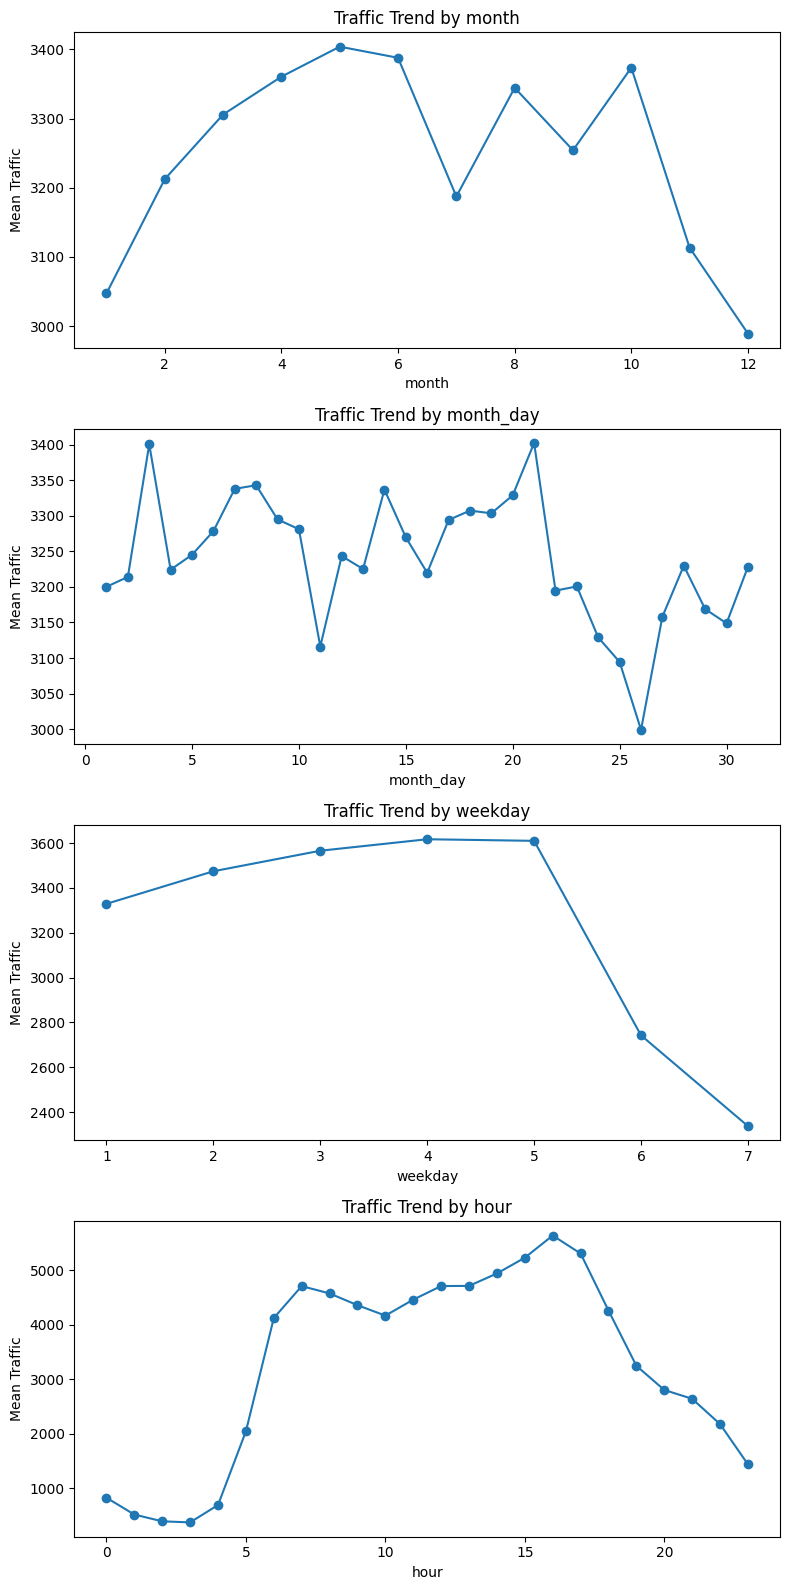

In [48]:
metrics = ['month', 'month_day', 'weekday', 'hour']
fig = plt.figure(figsize=(8, 4*len(metrics)))
for i, metric in enumerate(metrics):
	ax = fig.add_subplot(len(metrics), 1, i+1)
	ax.plot(data.groupby(metric)['traffic_volume'].mean(), '-o')
	ax.set_xlabel(metric)
	ax.set_ylabel("Mean Traffic")
	ax.set_title(f"Traffic Trend by {metric}")
plt.tight_layout()
plt.show()

#Train the Model

In [50]:
regr = MLPRegressor(random_state=1, max_iter=500).fit(X, y)
new = []
print('predicted output :=',regr.predict(X[:10]))
print('Actual output :=',y[:10])

predicted output := [0.03444296 0.02816192 0.72252011 0.03958095 0.76991715 0.56480198
 0.75639213 0.64684121 0.47261448 0.05289131]
Actual output := [0.04361806 0.05158675 0.69760939 0.09184957 0.81658046 0.48734797
 0.90815043 0.6133091  0.58842444 0.04990913]


In [52]:
# error evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.2)
y_pred = regr.predict(testX)
print('Mean Absolute Error:', mean_absolute_error(testY, y_pred))


Mean Absolute Error: 0.07222641709395645


In [53]:
print(features)

['is_holiday', 'temperature', 'weekday', 'hour', 'month_day', 'year', 'month', 'weather_type', 'weather_description']


In [54]:
data2[features]

,is_holiday,temperature,weekday,hour,month_day,year,month,weather_type,weather_description
0,0,289.08,5,2,6,2014,6,5,6
1,0,293.46,5,2,28,2013,6,2,11
2,0,300.65,1,13,17,2013,6,3,3
3,0,290.91,7,5,22,2014,6,3,5
4,0,288.81,5,14,11,2014,4,2,2
...,...,...,...,...,...,...,...,...,...
9995,0,275.72,3,21,22,2017,3,2,10
9996,0,277.34,7,6,31,2013,3,1,8
9997,0,297.56,6,21,25,2015,7,7,12
9998,0,271.46,3,0,18,2017,1,7,12


#User input

In [56]:
ip = [0,268.410,5,12,27,2017,1,2,11]
ip = x_scaler.transform([ip])
out = regr.predict(ip)
print('Before inverse Scaling :',out)

Before inverse Scaling : [0.73448691]


In [62]:
y_pred = y_scaler.inverse_transform([out])
print('Traffic Volume : ',y_pred)

Traffic Volume :  [[5254.78488748]]


In [64]:
if(y_pred<=1000):
  print("No Traffic ")
elif y_pred>1000 and y_pred<=3000:
  print("Busy or Normal Traffic")
elif y_pred>3000 and y_pred<=5500:
  print("heavy Traffic")
else:
  print("Worst case")

heavy Traffic


#Evaluating Metrics 

In [67]:
import pickle
filename = 'trained_model1.sav'
pickle.dump(x_scaler, open(filename, 'wb'))
loaded_model1 = pickle.load(open('trained_model1.sav', 'rb'))

In [69]:
filename = 'trained_model2.sav'
pickle.dump(y_scaler, open(filename, 'wb'))
loaded_model2 = pickle.load(open('trained_model2.sav', 'rb'))

In [71]:
filename = 'trained_model3.sav'
pickle.dump(regr, open(filename, 'wb'))
loaded_model3 = pickle.load(open('trained_model3.sav', 'rb'))

In [73]:
ip = [0,268.410,5,12,27,2017,1,2,11]

ip = loaded_model1.transform([ip])

out = loaded_model3.predict(ip)
print('Before inverse Scaling :',out)

y_pred = loaded_model2.inverse_transform([out])
print('Traffic Volume : ',y_pred)

if(y_pred<=1000):
  print("No Traffic ")
elif y_pred>1000 and y_pred<=3000:
  print("Busy or Normal Traffic")
elif y_pred>3000 and y_pred<=5500:
  print("heavy Traffic")
else:
  print("Worst case")

Before inverse Scaling : [0.73448691]
Traffic Volume :  [[5254.78488748]]
heavy Traffic
